**Analysis of KMeans**

Student: Michael Menjares

Your stakeholder is a credit card company that wants to market new credit cards. They have asked you to segment their potential customers to determine how and what kind of cards they should market to each group.

You can download the data You can download the data [here](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv). The original data is from this data source [here](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)

Steps

- Make a copy of your code file from KMeans Exercise Part 1.

- Create analytical visualizations that explore statistics for each feature for each cluster.
- Write a description of each cluster, based on the visualizations you created. **Do more than describe the numbers, try to see past the numbers and describe what kinds of people are represented by each cluster. Include at least one insight for each cluster.**
- Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit cards differently, or which cards they should market, to each cluster based on your data and insights.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
url = 'https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv'
df_original = pd.read_csv(url)
df = df_original.copy()
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
drop_cols = ['Unnamed: 0','Customer Id']
df = df.drop(columns = drop_cols)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [6]:
df['Defaulted'].value_counts(dropna=False)

0.0    517
1.0    183
NaN    150
Name: Defaulted, dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'constant',fill_value=2)
imp_df = imputer.fit_transform(df)

In [8]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(imp_df)

C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

Text(0, 0.5, 'inertia')

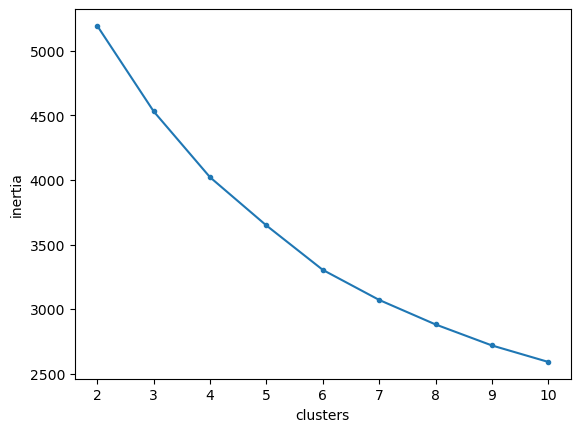

In [9]:
#Create an empty list of inertias
inertias = []

#Loop through k vales between 2 and 10 and store the inertias in the list
for k in range(2,11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(scaled_df)
        inertias.append(kmeans.inertia_)

#Visualize score
plt.plot(range(2,11), inertias, marker= '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

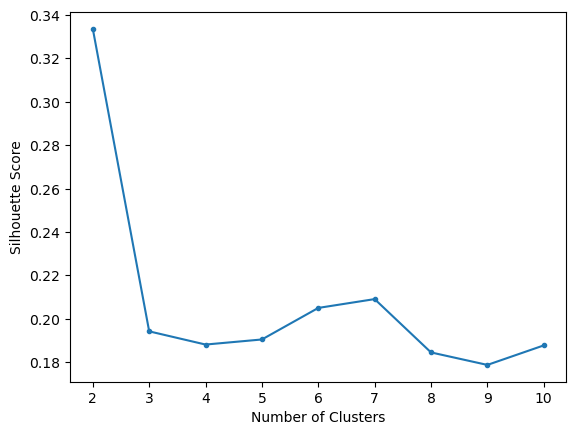

In [10]:
#Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
    
#visualize scores
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [11]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0.3384851475542568

I would choose k to be 2 since it has the highest Silhouette score of .338

In [12]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score
kmeans = KMeans(n_clusters=2,random_state=42)

# Fit your model on the scaled data
kmeans.fit(scaled_df)

# add a column to the dataframe to add the cluster label as you fit and predict x 
df['Cluster'] = kmeans.labels_

# examine your dataframe with .head()
df.head()

C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


In [13]:
# Use .groupby() to investigate the minimum, maximum, and mean value for each feature in each cluster.
cluster_groups = df.groupby('Cluster')
for col in df.columns:
  print('\n', col)
  display(cluster_groups[col].describe())


 Age


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,42.071429,6.847421,26.0,38.0,41.5,47.0,56.0
1,654.0,32.918960,7.122286,20.0,28.0,32.0,38.0,55.0



 Edu


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,1.933673,1.043018,1.0,1.0,2.0,3.0,5.0
1,654.0,1.643731,0.880266,1.0,1.0,1.0,2.0,5.0



 Years Employed


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,15.897959,6.784583,0.0,11.0,16.0,21.0,33.0
1,654.0,6.368502,5.001101,0.0,2.0,5.5,10.0,23.0



 Income


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,91.229592,55.529372,26.0,58.0,75.0,110.75,446.0
1,654.0,33.322630,15.370908,13.0,22.0,29.0,41.00,105.0



 Card Debt


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,3.831980,3.292749,0.146,1.61225,2.9265,4.96775,20.561
1,654.0,0.900962,0.808680,0.012,0.31025,0.6230,1.27325,5.283



 Other Debt


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,7.210633,4.72253,0.821,4.26175,6.0510,9.04825,35.197
1,654.0,1.840479,1.30353,0.046,0.89150,1.5355,2.55125,7.217



 Defaulted


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,156.0,0.294872,0.457454,0.0,0.0,0.0,1.0,1.0
1,544.0,0.251838,0.434468,0.0,0.0,0.0,1.0,1.0



 DebtIncomeRatio


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,14.151020,7.848354,1.2,7.8,13.25,18.425,41.3
1,654.0,8.979052,5.842214,0.1,4.8,7.70,12.100,33.4



 Cluster


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,654.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


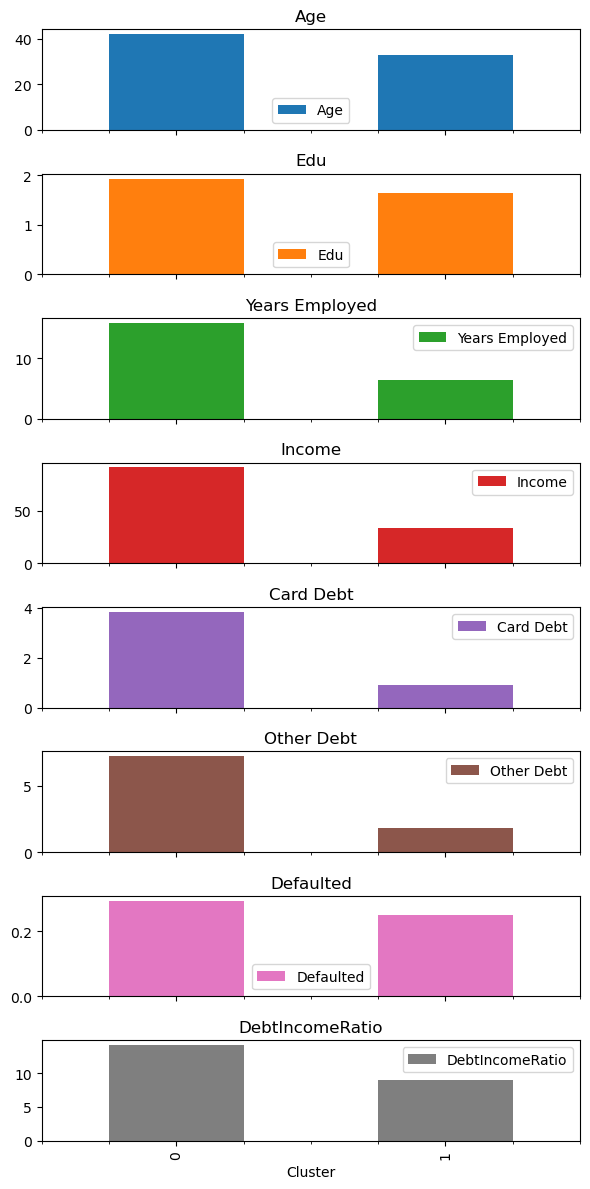

In [15]:
cluster_groups.mean().plot(subplots = True, kind = 'bar', figsize = (6,12))
plt.tight_layout()

Cluster 0: older, have more credit and other debt, worked longer, make more income, and DTI is higher. May have a mortgage/house or car payment since more other debt and dti higher.

Cluster 1: younger, have less credit and other debt, worked less, make less income, and DTI lower. May not have a mortgage/house or car payment since less other debt and dti lower.

Recommendations:
For cluster 1: I would market a high limit, lower interest credit card with an promotional balance transfer offer to consolidate debt and help save interest on credit card debt.

For cluster 2: I would recommend a moderate to higher interest, rewards card to incentivize using the card debt since they have little card debt and dti has room for a larger monthly payment